[sklearn.cluster.KMeans example](https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/kmean/kmean.ipynb)

[K-Means Clustering Concept](https://eunsukimme.github.io/ml/2019/12/16/K-Means)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
from copy import deepcopy

In [2]:
def charting(means_x, means_y, centroids, init_x=None, init_y=None):
    if init_x is not None:
        if init_y is not None:
            print("     init_x:", init_x)            
            print("     init_y:", init_y)
            plt.scatter(init_x, init_y, c="red")
    # print("  centroids:", centroids)
    print("    means_x:", means_x)
    print("    means_y:", means_y)
    plt.scatter(data_x, data_y, c=centroids)    
    plt.scatter(means_x, means_y, c="blue")

In [3]:
def generate(generate):
    file = "../data/input" + str(data_n) + ".0.csv"
    columns=["x", "y"]
    df = None
    if generate:
        data = np.random.randint(0, 100, size=(data_n, 2))
        df = pd.DataFrame(data, columns=columns)
        df.to_csv(file, sep=" ", columns=columns, header=False, index=False)
    else:
        df = pd.read_csv(file, sep=" ", names=columns)
    return df

In [4]:
data_n = 20
df = generate(False)
data_x = df.values[:, 0]
data_y = df.values[:, 1]
centroids_n = 3
centroids = np.zeros(data_n)
means_x = np.zeros(centroids_n)
means_y = np.zeros(centroids_n)
errors = np.zeros(centroids_n)

# Reference using sklearn

    means_x: [68.57142857 56.         17.33333333]
    means_y: [68.28571429 19.         48.        ]


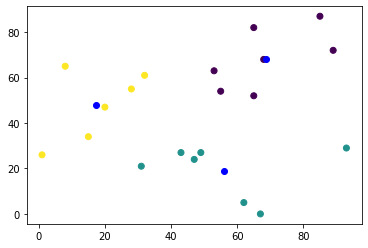

In [5]:
def sklean_kmeans():
    kmeans = KMeans(n_clusters=centroids_n).fit(df.values)
    charting(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.labels_)

sklean_kmeans()

# Reference using  ImadDabbura.kmeans
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

    means_x: [71.625      17.33333333 49.83333333]
    means_y: [63.375      48.         17.33333333]


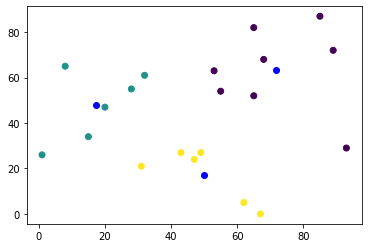

In [6]:
import ImadDabbura.kmeans

def ImadDabburaKmeans():
    km = ImadDabbura.kmeans.Kmeans(n_clusters=centroids_n)
    km.fit(df.values)
    charting(km.centroids[:, 0], km.centroids[:, 1], km.labels)
    
ImadDabburaKmeans()

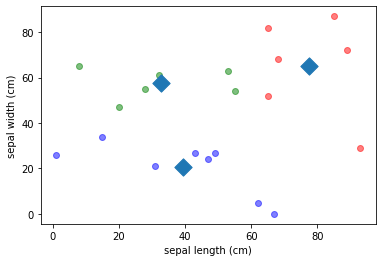

array([[77.5       , 65.        ],
       [32.66666667, 57.5       ],
       [39.375     , 20.5       ]])

In [7]:
from eunsukimme.kmeans import eunsukimme_kmeans

eunsukimme_kmeans(df.values, centroids_n)

# Implement

## STEP01: Place k random centroids

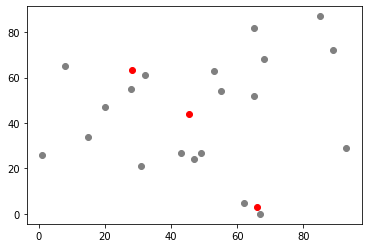

In [8]:
def randomize():
    centroids_x = np.random.uniform(min(data_x), max(data_x), centroids_n)
    centroids_y = np.random.uniform(min(data_y), max(data_y), centroids_n)
    return centroids_x, centroids_y

centroids_x, centroids_y = randomize()
plt.scatter(data_x, data_y, c="gray")
plt.scatter(centroids_x, centroids_y, c="red")

## STEP02: Assign datas to nearest centroids

In [9]:
def distance(x, y, u, v):
    return ((x - u)**2 + (y - v)**2)**0.5

In [10]:
def error(old_x, old_y, new_x, new_y):
    for i in range(centroids_n):
        errors[i] = distance(old_x[i], old_y[i], new_x[i], new_y[i])

In [11]:
def evaluate(centroids_x, centroids_y):
    distances = np.zeros(centroids_n)
    counts = np.zeros(centroids_n)
    for d in range(data_n):
        c = int(centroids[d])
        distances[c] = distances[c] + distance(data_x[d], data_y[d], centroids_x[c], centroids_y[c])
        counts[c] += 1
    a = 0.
    for c in range(centroids_n):
        a = a + distances[c] / counts[c]
    return a / centroids_n

    means_x: [65.84080678 45.3342904  28.20097763]
    means_y: [ 2.98418433 43.89726849 63.24352149]


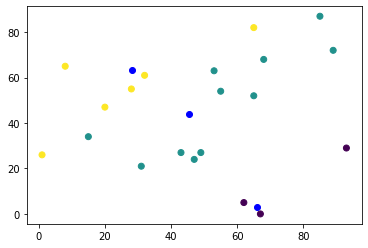

In [12]:
def nearest():
    for d in range(data_n):
        distances = np.zeros(centroids_n)
        for c in range(centroids_n):
            distances[c] = distance(data_x[d], data_y[d], centroids_x[c], centroids_y[c])
        centroids[d] = np.argmin(distances)
    
nearest()
charting(centroids_x, centroids_y, centroids)

## STEP03: Update centroids

    means_x: [65.84080678 45.3342904  28.20097763]
    means_y: [ 2.98418433 43.89726849 63.24352149]


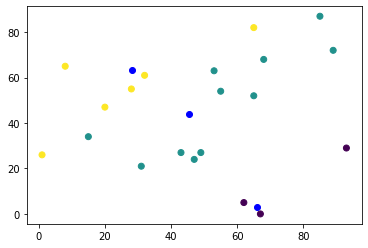

In [13]:
def update():
    counts = np.zeros(centroids_n)
    sum_x = np.zeros(data_n)
    sum_y = np.zeros(data_n)
    for i in range(data_n):
        c = int(centroids[i])
        sum_x[c] = sum_x[c] + data_x[i]
        sum_y[c] = sum_y[c] + data_y[i]
        counts[c] = counts[c] + 1
    
    for c in range(centroids_n):
        means_x[c] = sum_x[c] / counts[c];
        means_y[c] = sum_y[c] / counts[c];
    
update()
charting(centroids_x, centroids_y, centroids)

      count: 2
     init_x: [26.28412844 62.34104123 53.36025959]
     init_y: [79.38187029 44.49877323 39.34245681]
    means_x: [74.         54.54545455 25.66666667]
    means_y: [11.33333333 48.09090909 56.        ]


22.18851258619287

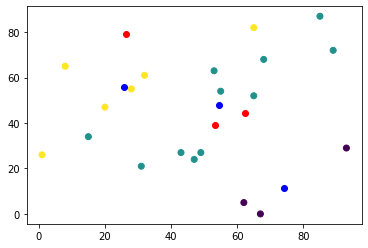

In [14]:
def cluster():
    count = 0
    centroids_x, centroids_y = randomize()
    init_x = deepcopy(centroids_x)
    init_y = deepcopy(centroids_y)
    error(centroids_x, centroids_y, means_x, means_y)        
    while (errors.all() != 0):
        nearest()
        update()
        error(centroids_x, centroids_y, means_x, means_y)        
        centroids_x = deepcopy(means_x)
        centroids_y = deepcopy(means_y)
        count = count + 1    
    print("      count:", count)
    charting(centroids_x, centroids_y, centroids, init_x, init_y)

cluster()
evaluate(centroids_x, centroids_y)

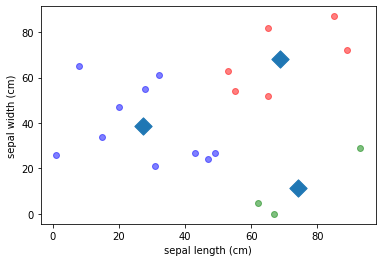

45.62324460174273

In [15]:
c = eunsukimme_kmeans(df.values, centroids_n)
evaluate(c[:, 0], c[:, 1])

    means_x: [17.33333333 68.57142857 56.        ]
    means_y: [48.         68.28571429 19.        ]


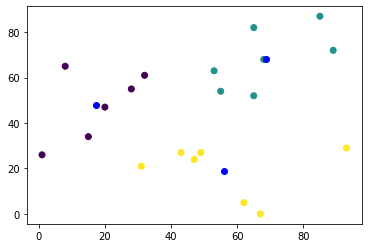

In [16]:
sklean_kmeans()

    means_x: [32.66666667 39.375      77.5       ]
    means_y: [57.5 20.5 65. ]


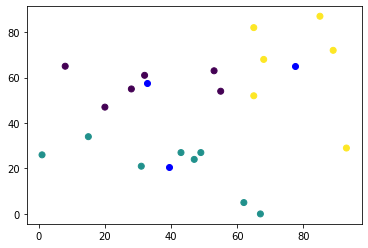

In [17]:
ImadDabburaKmeans()